<a href="https://colab.research.google.com/github/Mario-U-KY/DataScience/blob/main/2_3_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>2.3 Linear Algebra</h1>

<h2>2.3.1 Scalars</h2>

간단한 Scalars 연산

In [1]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

<h2> 2.3.2 Vectors </h2>

벡터표현을 위해 축이 하나인 텐서 구조를 이용할 수 있다.

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

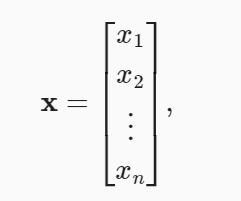

indexing을 통해 vector의 요소에 접근할 수 있다.

In [3]:
x[3]

tensor(3)

<h3>Length, Dimension and Shape.</h3><br> 벡터는 숫자의 array.
벡터의 길이는 vector의 차원(dimension)이라고도 불린다.

파이썬 내장 함수인 len을 통해서 벡터의 길이를 쉽게 구할 수 있다.

In [4]:
len(x)

4

tensor가 벡터 즉 축이 하나인 형태이더라도 .shape 속성을 이용해서 length 에 접근할 수 있다. shppe attribute는 각 축별 길이가 튜플 형태로 반환된 속성이므로 axis 개수가 하나면(벡터이면) 그 길이를 반환한다.

In [5]:
x.shape

torch.Size([4])

<h2> 2.3.3 Matrices</h2>

텐서 축 두개를 사용하면 행렬을 구현할 수 있다. 아래는 5 by 4 matrix


In [6]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

행렬의 transpose는 아래와 같은 attribute 이용 시 가능하다.

In [7]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

symmetric metrix를 만들어보자

In [8]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [9]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

<h2>2.3.4 Tensors</h2>

scalar는 0차원, vector는 1차원, matrix는 2차원이라면, tensor는 축이 3개인 3차원 구조라고 볼 수 있다. Image 데이터를 height, weight 그리고 chanel(Red, Blue, Green)로 나누기 때문에 Tensor가 핵심이라고 볼 수 있다.

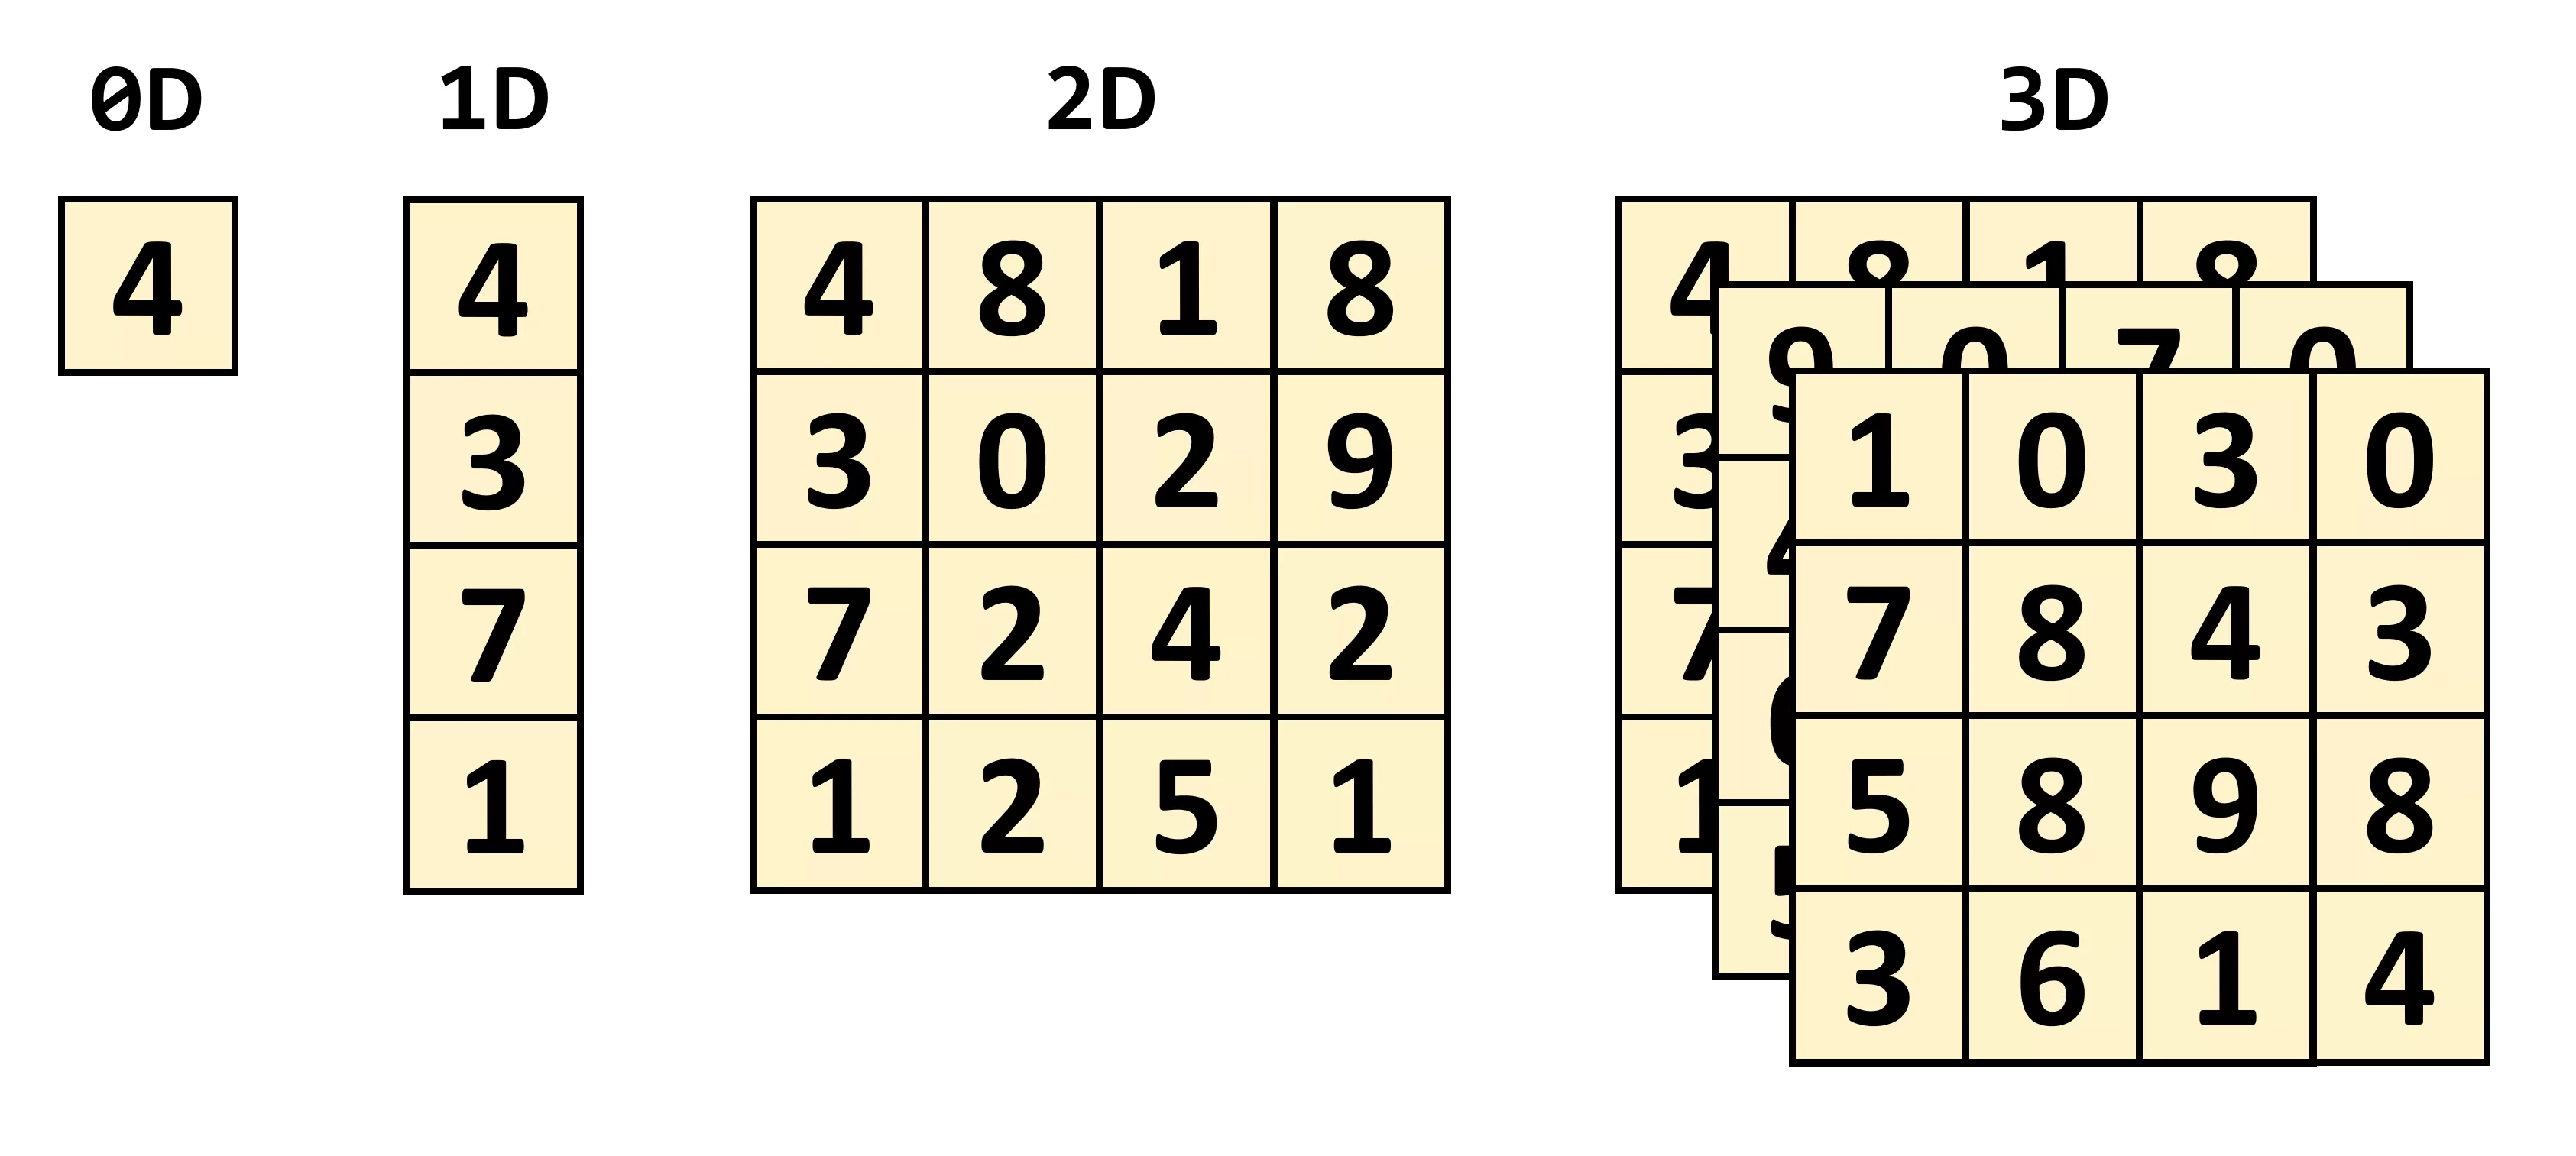

In [10]:
X = torch.arange(24).reshape(2,3,4) #width = 3, height = 4, chanel = 2인 텐서구조
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

<h2>2.3.5 Basic Properties of Tensor Arithmetic</h2>

구조가 같은 tensor의 경우 elementwise operation이 가능하다.

In [11]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
B = A.clone() #A의 구조, 값을 복사해서 새로운 메모리에 할당 후 변수 B에 매핑
A, A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

아래와 같은 Hadamard Product 연산은 간단하게 A*B로 수행할 수 있음

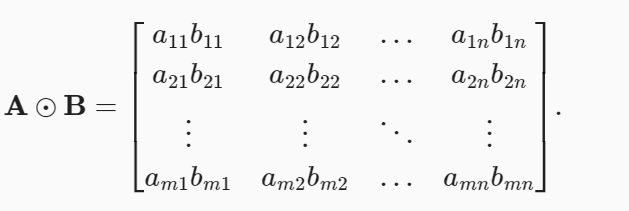

In [12]:
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

스칼라와의 연산으로 텐서 구조를 변경하지 않고 tensor 에 adding 이나 multiplying이 가능하다

In [13]:
a=2 
X = torch.arange(24).reshape(2,3,4)
a+X , (a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

<h2>2.3.6 Reduction</h2>

Tensor 의 합 구하기

In [15]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

Matrix 의 경우에도 합 구할 수 있음.

In [16]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

sum 함수는 모든 axes를 스칼라 형태로 변환한다. 즉 tensor가 reducing 된다고 볼 수 있다. axis= 0, 1등을 추가함으로서 어떻게 reducing할 지 명시할 수 있다.

In [18]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [19]:
A_sum_axis0=A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape #각 열단위로 합친다고 볼 수 있음.

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [20]:
A_sum_axis1=A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape #각 행단위로 합친다고 볼 수 있음.

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [21]:
A.sum(axis=[0,1])#A.sum()과 같다.

tensor(190.)

비슷한 방법으로 mean()함수가 있다. sum()/numel() 과 같은 연산을 수행한다.

In [22]:
A.mean(), A.sum()/A.numel()

(tensor(9.5000), tensor(9.5000))

In [23]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [26]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A_1 = A.sum(axis=1) 
#축의 개수를 변환하지 않고도 함수를 실행할 수 있음 축의 개수가 변하면 안되는 경우에 사용.
sum_A, sum_A_1

(tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]), tensor([ 6., 22., 38., 54., 70.]))

In [28]:
A/sum_A #이 방법으로 broadcasting하면서 각각 다른 숫자로 dividing이 가능

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [30]:
A.cumsum(axis=0) #행 단위 누적합 

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [32]:
 A.cumsum(axis=1) #열 단위 누적합

tensor([[ 0.,  1.,  3.,  6.],
        [ 4.,  9., 15., 22.],
        [ 8., 17., 27., 38.],
        [12., 25., 39., 54.],
        [16., 33., 51., 70.]])

<h2>2.3.7 Dot Products</h2>

요소간 연산 말고, 선형대수의 dot product를 사용해보자

In [33]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [37]:
torch.sum(x*y) #dot product를 구현하는 다른 방법

tensor(6.)

<h2>2.3.8 Matrix-Vector Products</h2>

Matrix와 Vector의 연산

In [38]:
A, x

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([0., 1., 2., 3.]))

In [39]:
A.shape, x.shape, torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

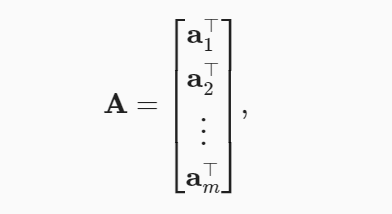


Matrix를 a1~am 의 transpose된 벡터라고 생각했을 때, A와 벡터 x와의 연산은 아래와 같이 진행된다.

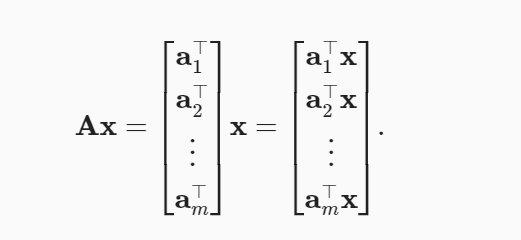

<h2>2.3.9 Matrix-Matrix Multiplication</h2>

아래와 같은 행렬 A, B에대하여
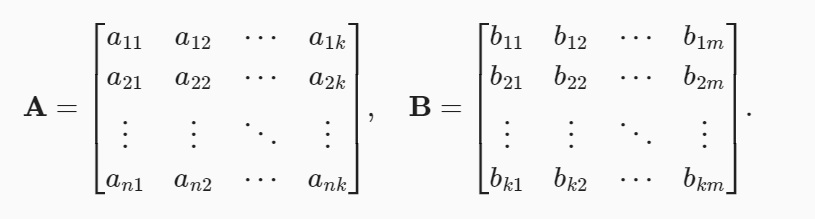

ai(transpose) 를 A행렬 row벡터라고 하고, b1을 B행렬 column vector라고 했을 때, 두 행렬의 연산 C는 아래와 같이 수행된다.
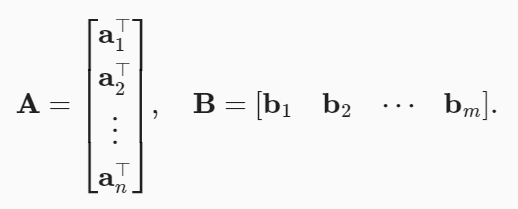
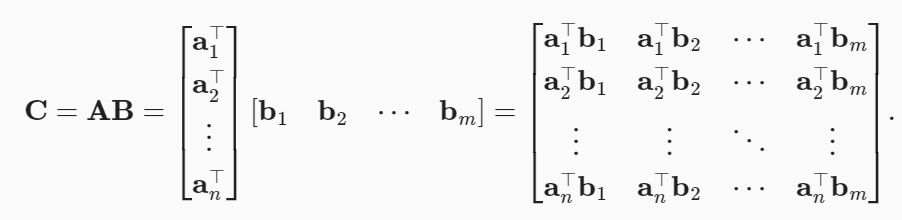

AB 즉 행렬의 multiplication을 m matrix-vector products를 진행한 뒤 결과를 모두 모아 n개의 열을 사용해 합친 것으로 볼 수 있다. A는 5행 4열, B는 4행 3열로, multiplication 이후 5행 3열의 행렬을 얻을 수 있다.

In [42]:
B = torch.ones(4,3)
A, B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

In [43]:
torch.mm(A,B) #matrix multiplication

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

<h2>2.3.10 Norms</h2>

벡터의 norm은 벡터의 크기를 의미한다. 

In [47]:
u = torch.tensor([3.0,-4.0])
torch.norm(u) #L2 norm 이자 유클리디언 거리 구하기 3sq + 4sq 를 sqrt한 결과

tensor(5.)

In [49]:
torch.abs(u).sum()#L1 norm 즉 절댓값들의 합을 구하기 위해 다음과 같이 사용

tensor(7.)

일반적인 Lp norm의 형태
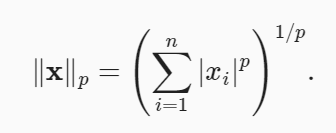

Matrix에서 계산되는 Frobenius norm의 형태
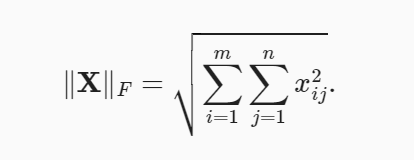

In [50]:
torch.norm(torch.ones((4,9)))

tensor(6.)